## **Nama : Markus Pardede**
## **Email: pardedemarkus32@gmail.com**
## **Classification Trashtype Data with convolutional neural network ( CNN )**

Image Classification: Deteksi Jenis Sampah di Sekitar Lingkungan

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import zipfile
import shutil

Extract ZIP

In [ ]:
zip_path = "archive.zip"
extract_to = "TrashType_Image_Dataset"

# 2. Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# 3. Tampilkan isi folder setelah diekstrak
print("ZIP berhasil diekstrak ke folder:", extract_to)
print("Isi folder utama setelah ekstrak:")
print(os.listdir(extract_to))

# 4. Cek struktur folder lebih dalam (optional)
print("\n📂 Struktur folder level 2:")
for item in os.listdir(extract_to):
    item_path = os.path.join(extract_to, item)
    if os.path.isdir(item_path):
        print(f"- {item}/ : {os.listdir(item_path)[:6]}")

ZIP berhasil diekstrak ke folder: TrashType_Image_Dataset
Isi folder utama setelah ekstrak:
['TrashType_Image_Dataset']

📂 Struktur folder level 2:
- TrashType_Image_Dataset/ : ['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']


Cek Folder

In [ ]:
for root, dirs, files in os.walk("TrashType_Image_Dataset"):
    print(f"📁 {root}")
    for d in dirs:
        print(f"   └── 📂 {d}")
    for f in files[:3]:  # tampilkan hanya 3 file pertama biar tidak terlalu panjang
        print(f"   └── 📄 {f}")

📁 TrashType_Image_Dataset
   └── 📂 TrashType_Image_Dataset
📁 TrashType_Image_Dataset/TrashType_Image_Dataset
   └── 📂 glass
   └── 📂 trash
   └── 📂 metal
   └── 📂 plastic
   └── 📂 cardboard
   └── 📂 paper
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/glass
   └── 📄 glass_419.jpg
   └── 📄 glass_344.jpg
   └── 📄 glass_044.jpg
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/trash
   └── 📄 trash_046.jpg
   └── 📄 trash_034.jpg
   └── 📄 trash_071.jpg
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/metal
   └── 📄 metal_188.jpg
   └── 📄 metal_317.jpg
   └── 📄 metal_238.jpg
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/plastic
   └── 📄 plastic_069.jpg
   └── 📄 plastic_456.jpg
   └── 📄 plastic_280.jpg
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/cardboard
   └── 📄 cardboard_302.jpg
   └── 📄 cardboard_269.jpg
   └── 📄 cardboard_180.jpg
📁 TrashType_Image_Dataset/TrashType_Image_Dataset/paper
   └── 📄 paper_324.jpg
   └── 📄 paper_373.jpg
   └── 📄 paper_419.jpg


 Ambil kelas yang dipilih dan Potong Data jadi 130

In [ ]:
# Path yang benar setelah melihat struktur folder
dataset_base = os.path.join("TrashType_Image_Dataset", "TrashType_Image_Dataset")
selected_classes = ['paper', 'cardboard', 'trash']
output_dir = "Trash_Selected"

# Buat folder output
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Proses penyalinan gambar per kelas
for class_name in selected_classes:
    src_dir = os.path.join(dataset_base, class_name)
    dst_dir = os.path.join(output_dir, class_name)
    os.makedirs(dst_dir, exist_ok=True)

    if os.path.exists(src_dir):
        # Ambil maksimal 120 file JPG
        images = [f for f in os.listdir(src_dir) if f.lower().endswith('.jpg')][:130]
        print(f"[{class_name}]{len(images)} gambar ditemukan dan disalin.")

        for img_name in images:
            src_img = os.path.join(src_dir, img_name)
            dst_img = os.path.join(dst_dir, img_name)
            shutil.copy(src_img, dst_img)
    else:
        print(f"Folder tidak ditemukan: {src_dir}")

print("Selesai menyalin gambar ke folder Trash_Selected.")

[paper]130 gambar ditemukan dan disalin.
[cardboard]130 gambar ditemukan dan disalin.
[trash]130 gambar ditemukan dan disalin.
Selesai menyalin gambar ke folder Trash_Selected.


### Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    shear_range = 0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'data/train',
    target_size=(128, 128),
    class_mode='categorical',
    shuffle=True,
    batch_size=16
)

test_data = test_datagen.flow_from_directory(
    'data/val',
    target_size=(128, 128),
    class_mode='categorical',
    shuffle=False,
    batch_size=16
)

Found 429 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


### Arsitektur CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training model & Classification Report

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 581ms/step - accuracy: 0.4129 - loss: 1.1933 - val_accuracy: 0.6111 - val_loss: 0.7602
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 566ms/step - accuracy: 0.7181 - loss: 0.7504 - val_accuracy: 0.6759 - val_loss: 0.7384
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - accuracy: 0.7540 - loss: 0.6523 - val_accuracy: 0.7222 - val_loss: 0.6251
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 545ms/step - accuracy: 0.7109 - loss: 0.6535 - val_accuracy: 0.7407 - val_loss: 0.6056
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.7526 - loss: 0.5840 - val_accuracy: 0.6852 - val_loss: 0.6309
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 549ms/step - accuracy: 0.8234 - loss: 0.4822 - val_accuracy: 0.7685 - val_loss: 0.6486
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 546ms/step - accuracy: 0.7915 - loss: 0.5361 - val_accuracy: 0.7778 - val_loss: 0.6664
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 549ms/step - accuracy: 0.7556 - loss: 0.6548 - val_accu

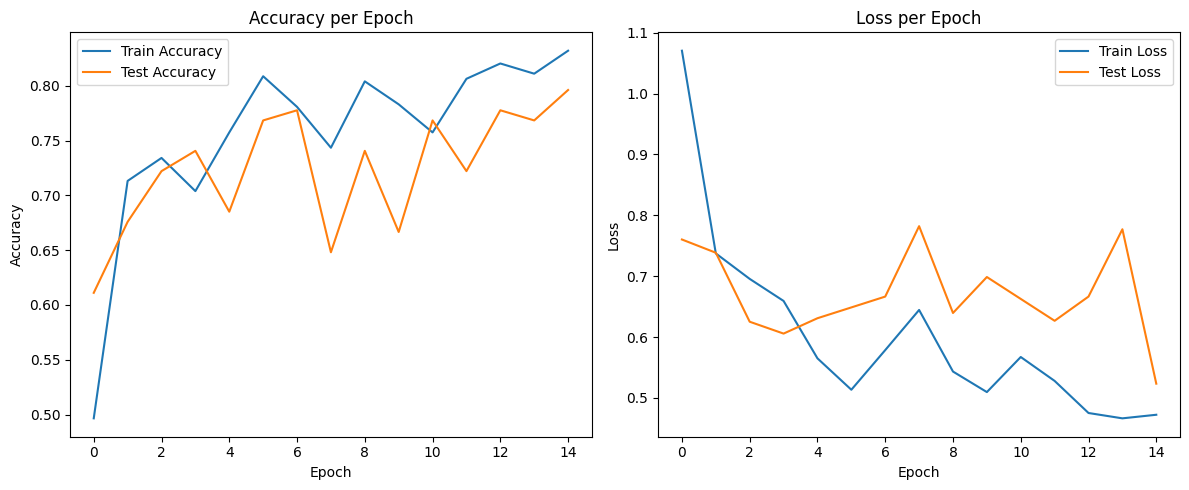

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


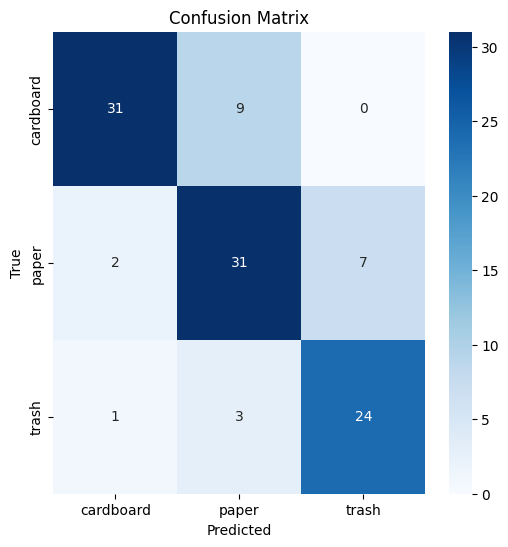

Classification Report:

              precision    recall  f1-score   support

   cardboard       0.91      0.78      0.84        40
       paper       0.72      0.78      0.75        40
       trash       0.77      0.86      0.81        28

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.81      0.80      0.80       108



In [ ]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_data.reset()

# Prediksi kelas
preds = model.predict(test_data)
y_pred = np.argmax(preds, axis=1)
y_true = test_data.classes

labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


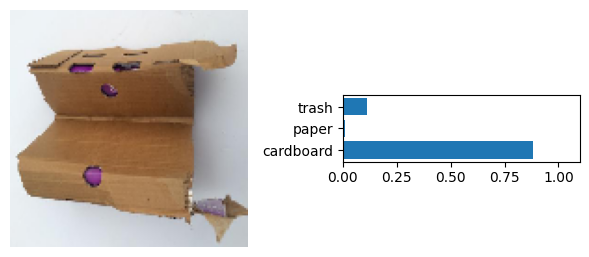

In [ ]:
def view_classification(image, probabilities, class_labels):
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)

    # Tampilkan gambar
    ax1.imshow(image)
    ax1.axis('off')

    # Tampilkan prediksi probabilitas
    ax2.barh(np.arange(len(class_labels)), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_labels)))
    ax2.set_yticklabels(class_labels)
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

class_labels = list(test_data.class_indices.keys())

for images, labels in test_data:
    image = images[15]
    probabilities = model.predict(image.reshape(1, 128, 128, 3))[0]
    view_classification(image, probabilities, class_labels)
    break